In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
from datetime import datetime,date
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import category_encoders as ce

In [2]:
# Loading Dataset
data=pd.read_excel(r"C:\Users\manir\Downloads\Dummy_data.xlsx", index_col=[0]).reset_index(drop=True)

### Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan no             1000 non-null   int64  
 1   PRODUCT             1000 non-null   object 
 2   SCHEME              1000 non-null   object 
 3   BRANCH_NAME         1000 non-null   object 
 4   AMTFIN              1000 non-null   float64
 5   DPD                 1000 non-null   int64  
 6   OVERDUE             1000 non-null   float64
 7   Total_Outstanding   1000 non-null   float64
 8   STATUS              1000 non-null   object 
 9   DPD_GROUP           1000 non-null   object 
 10  NO_OF_BOUNCE        653 non-null    float64
 11  NPA_STAGE_ID        1000 non-null   object 
 12  DOB                 895 non-null    object 
 13  BRANCHID            1000 non-null   int64  
 14  CUSTOMER_IRR        1000 non-null   float64
 15  SCHEME_ID           1000 non-null   int64  
 16  LOANDAT

In [4]:
data.head()

Loan no PRODUCT   SCHEME     BRANCH_NAME     AMTFIN  DPD   OVERDUE  \
0  4492361      CE   CE NEW   CHINTAMANI VF  2630854.0    4  50046.00   
1  4492362      CE   CE NEW        GUMLA VF  1935000.0    4  85279.53   
2  4492363      CE  CE USED   GADCHIROLI VF  1126085.0    0    278.73   
3  4492364      CE   CE NEW     GUWAHATI VF  1700000.0    0      0.00   
4  4492365      CE   CE NEW  MUZAFFARPUR VF  2032500.0    0   5213.00   

   Total_Outstanding  STATUS DPD_GROUP  ...                MAKE ASSETTYPE  \
0          2466435.0  ACTIVE      0-30  ...  JCB BACKHOE LOADER       NEW   
1          1104895.0  ACTIVE      0-30  ...  JCB BACKHOE LOADER       NEW   
2           772164.0  ACTIVE      0-30  ...  JCB BACKHOE LOADER      USED   
3          1252415.0  ACTIVE      0-30  ...  JCB BACKHOE LOADER       NEW   
4          1415699.0  ACTIVE      0-30  ...  JCB BACKHOE LOADER       NEW   

                MODEL  CATGDESC  PRINCIPAL_OVERDUE  REVISED_FINAL_DPD  \
0  ECO XPERT 3DX-49HP        CE          2444061.0                  4   
1            3DX-76HP        CE          1092916.0                  4   
2            3DX-76HP        CE           772164.0                  0   
3     3DX SUPER-74 HP        CE          1252415.0                  0   
4  ECO XPERT 3DX-49HP        CE          1415699.0                  0   

  Unnamed: 29  Unnamed: 30            Unnamed: 31 Unnamed: 32  
0         NaN          NaN                    NaN         NaN  
1         NaN    DPD_GROUP  Risk(Target variable)         NaN  
2         NaN         0-30                No risk         0.0  
3         NaN        31-60               Low risk         1.0  
4         NaN        61-90            Medium risk         2.0  

[5 rows x 32 columns]

In [5]:
# Last 4 columns are irrelevant
data=data.iloc[:,:-4]
print(data.shape,'\n')
data.info()

(1000, 28) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan no             1000 non-null   int64  
 1   PRODUCT             1000 non-null   object 
 2   SCHEME              1000 non-null   object 
 3   BRANCH_NAME         1000 non-null   object 
 4   AMTFIN              1000 non-null   float64
 5   DPD                 1000 non-null   int64  
 6   OVERDUE             1000 non-null   float64
 7   Total_Outstanding   1000 non-null   float64
 8   STATUS              1000 non-null   object 
 9   DPD_GROUP           1000 non-null   object 
 10  NO_OF_BOUNCE        653 non-null    float64
 11  NPA_STAGE_ID        1000 non-null   object 
 12  DOB                 895 non-null    object 
 13  BRANCHID            1000 non-null   int64  
 14  CUSTOMER_IRR        1000 non-null   float64
 15  SCHEME_ID           1000 non-null   int64  

### Data Preprocessing
* Zero Variance Features
* Missing Values
* Typecasting
* Handling Duplicates
* Outlier Treatment
* Handling the categorical columns

In [6]:
data.nunique()

Loan no               1000
PRODUCT                  1
SCHEME                   2
BRANCH_NAME            520
AMTFIN                 733
DPD                     53
OVERDUE                631
Total_Outstanding      975
STATUS                   1
DPD_GROUP                4
NO_OF_BOUNCE            34
NPA_STAGE_ID             3
DOB                    742
BRANCHID               520
CUSTOMER_IRR           351
SCHEME_ID                2
LOANDATE               615
AVG_EMI                929
BUCKET                 253
CUSTOMER_CATG_DESC       9
ASSETCOST              697
TENURE                  62
MAKE                    86
ASSETTYPE                3
MODEL                  176
CATGDESC                 1
PRINCIPAL_OVERDUE      975
REVISED_FINAL_DPD       53
dtype: int64

###  Zero Variance Features
Removing the unwanted column which is not important to increse the accuracy of the model
* Loan no : Loan no's are unique values for each customer
* PRODUCT, STATUS, CATGDESC : these column's contain only one value
* SCHEME and SCHEME_ID columns are same, so removing one of those column
* BRANCH_NAME and BRANCHID are same, so removing one of those column
* REVISED_FINAL_DPD and DPD are same, so removing one of those column
* DPD_group created using DPD

In [7]:
data.drop(['Loan no','PRODUCT','STATUS','CATGDESC','SCHEME','BRANCH_NAME','REVISED_FINAL_DPD'], axis=1, inplace=True) 
data.shape

(1000, 21)

In [8]:
data.isnull().sum()

AMTFIN                  0
DPD                     0
OVERDUE                 0
Total_Outstanding       0
DPD_GROUP               0
NO_OF_BOUNCE          347
NPA_STAGE_ID            0
DOB                   105
BRANCHID                0
CUSTOMER_IRR            0
SCHEME_ID               0
LOANDATE                0
AVG_EMI                38
BUCKET                 52
CUSTOMER_CATG_DESC      0
ASSETCOST               0
TENURE                  0
MAKE                    0
ASSETTYPE               0
MODEL                   4
PRINCIPAL_OVERDUE       0
dtype: int64

### Handling the Missing values
* NO_OF_BOUNCE: filling null values with 0, considering empty means as no bounce.
* MODEL: Filling the null values with most repeated value 
* AVG_EMI, BUCKET: Filling the null values of these columns with mean value

In [9]:
#Filling null values with 0
data['NO_OF_BOUNCE'].fillna(0, inplace=True)

# Handling Model column missing value with most repeated value
data["MODEL"].fillna(data["MODEL"].mode()[0], inplace = True)

# Handling the missing value in AVG_EMI and BUCKET column with mean value
data['AVG_EMI'].fillna(data['AVG_EMI'].mean(), inplace=True)
data['BUCKET'].fillna(data['BUCKET'].mean(), inplace=True)

### TYPECASTING

converting the DateOfBirth column into **AGE** column using datetime liberary and  dropping **DOB** column 

In [10]:
# define a function to calculate age
def calculate_age(born):
    if pd.isnull(born):
        return None
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# apply the lambda function to the 'dob' column and create a new 'age' column
data['AGE'] = data['DOB'].apply(lambda x: calculate_age(datetime.strptime(x, '%d-%b-%Y')) if pd.notna(x) else None)

# Dropping the DOB column because age is calculated using DOB
data.drop('DOB',axis=1, inplace=True) 

#filling the missing value in age column with mean age value
data['AGE']=data['AGE'].fillna(round(data['AGE'].mean()))

In [11]:
print(data.isnull().sum())
print('\n',data.columns)

AMTFIN                0
DPD                   0
OVERDUE               0
Total_Outstanding     0
DPD_GROUP             0
NO_OF_BOUNCE          0
NPA_STAGE_ID          0
BRANCHID              0
CUSTOMER_IRR          0
SCHEME_ID             0
LOANDATE              0
AVG_EMI               0
BUCKET                0
CUSTOMER_CATG_DESC    0
ASSETCOST             0
TENURE                0
MAKE                  0
ASSETTYPE             0
MODEL                 0
PRINCIPAL_OVERDUE     0
AGE                   0
dtype: int64

 Index(['AMTFIN', 'DPD', 'OVERDUE', 'Total_Outstanding', 'DPD_GROUP',
       'NO_OF_BOUNCE', 'NPA_STAGE_ID', 'BRANCHID', 'CUSTOMER_IRR', 'SCHEME_ID',
       'LOANDATE', 'AVG_EMI', 'BUCKET', 'CUSTOMER_CATG_DESC', 'ASSETCOST',
       'TENURE', 'MAKE', 'ASSETTYPE', 'MODEL', 'PRINCIPAL_OVERDUE', 'AGE'],
      dtype='object')


In [12]:
# Converting string dates and datetime dates to number of days

data['LOAN_SINCE_NO_DAYS']=data['LOANDATE'].apply(lambda x : (date.today() - datetime.strptime(x, '%d-%b-%y').date()).days if type(x)==str else (date.today() - x.date()).days)

data.drop('LOANDATE',axis=1, inplace=True) 

### Separating categorical & numerical features

In [13]:
df= data
# List of categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of categorical variables: ', len(categorical_features))

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of categorical variables:  6
Number of numerical variables:  15


In [14]:
data[numerical_features].nunique()

AMTFIN                733
DPD                    53
OVERDUE               631
Total_Outstanding     975
NO_OF_BOUNCE           35
BRANCHID              520
CUSTOMER_IRR          351
SCHEME_ID               2
AVG_EMI               930
BUCKET                254
ASSETCOST             697
TENURE                 62
PRINCIPAL_OVERDUE     975
AGE                    47
LOAN_SINCE_NO_DAYS    615
dtype: int64

### Outlier Treatment

Doing outlier treatment for numerical values and removing the outliers

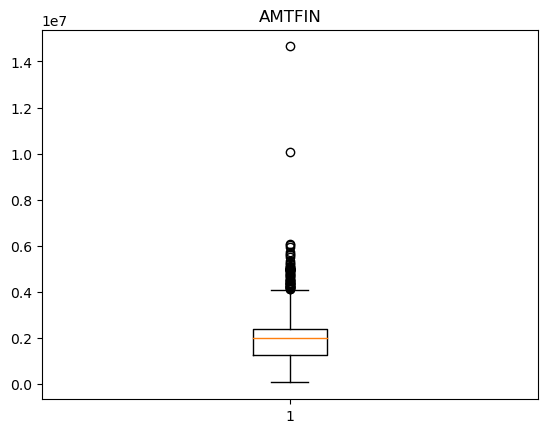

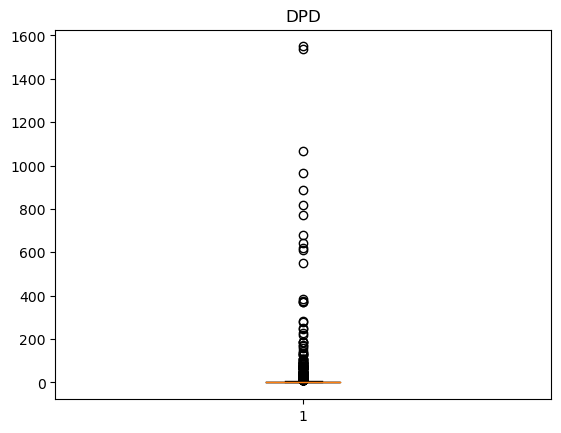

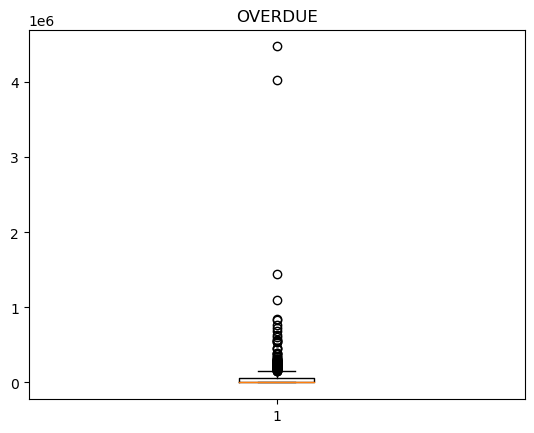

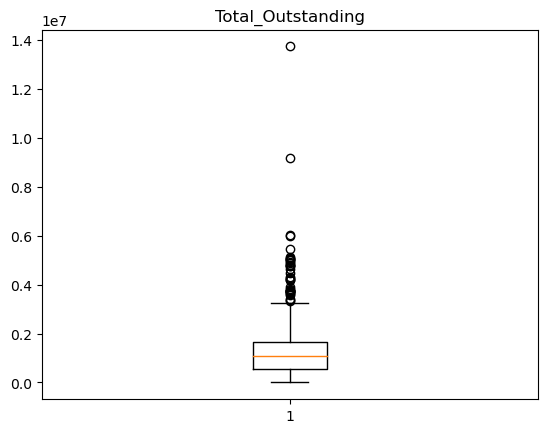

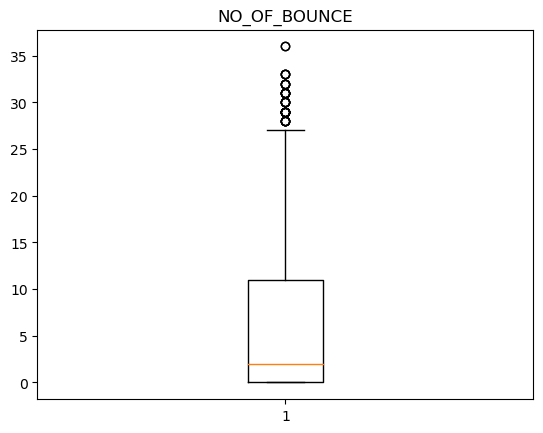

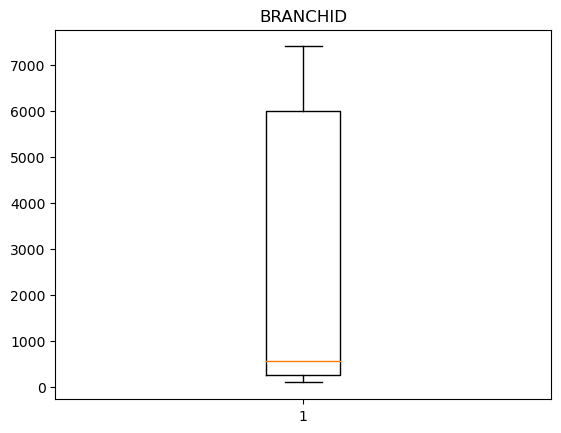

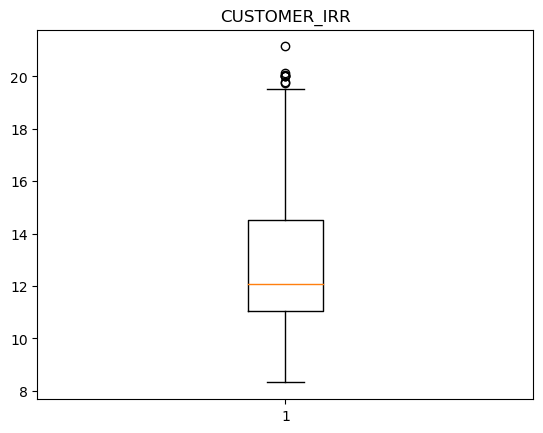

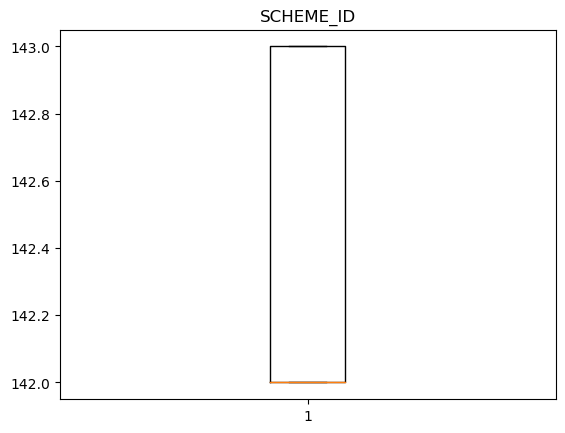

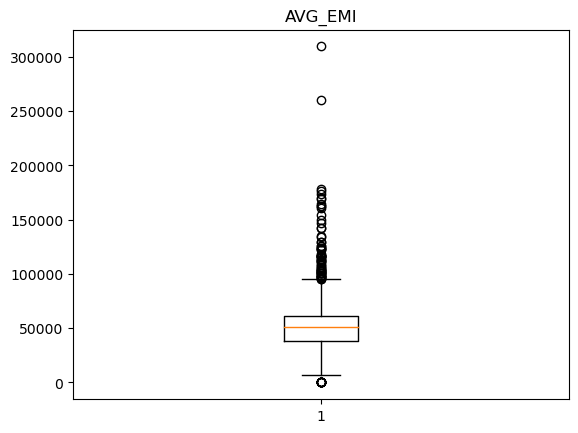

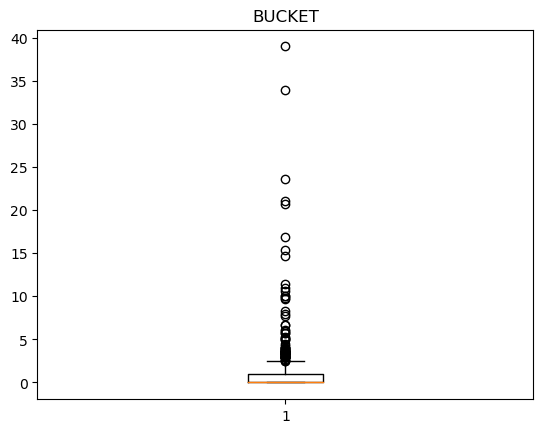

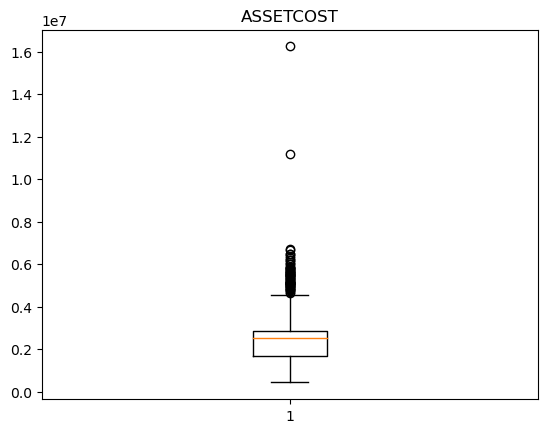

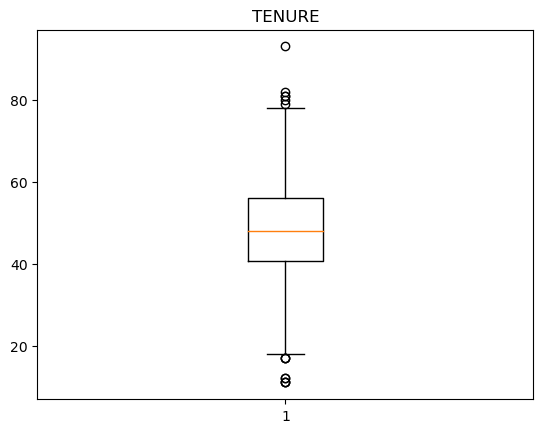

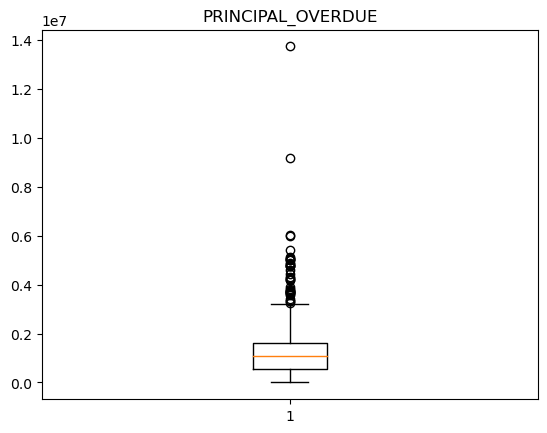

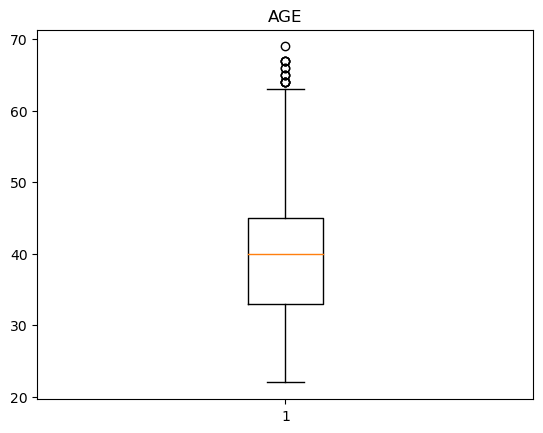

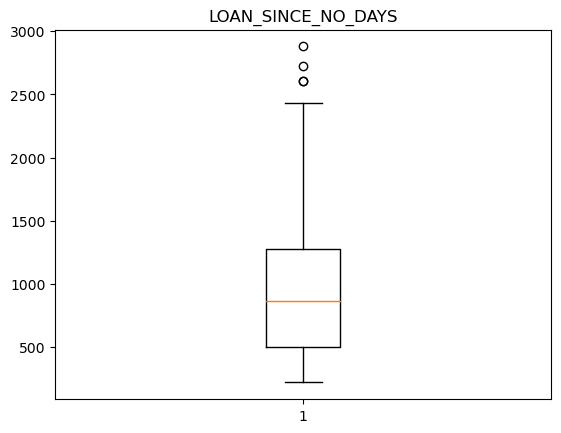

In [15]:
for i in numerical_features:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


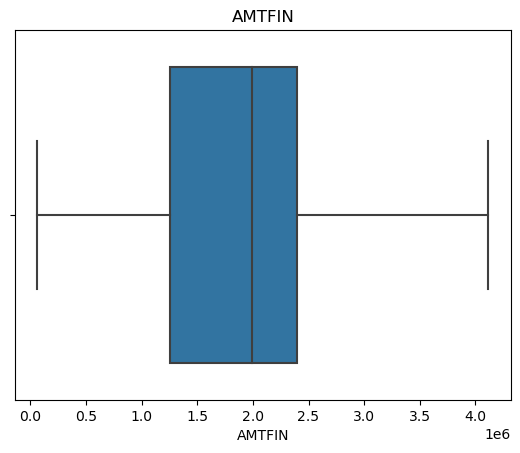

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


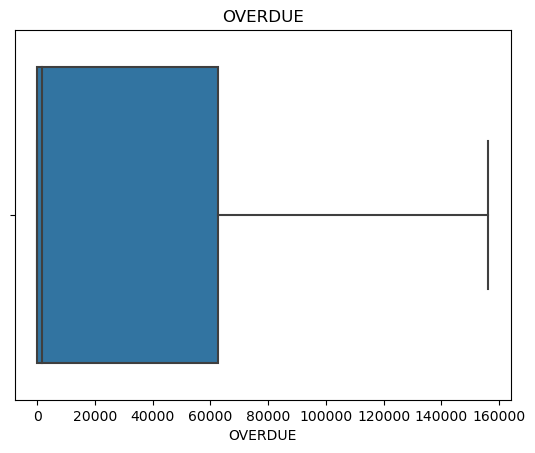

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


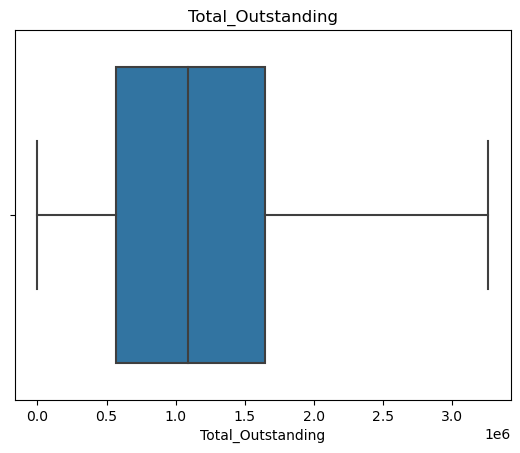

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


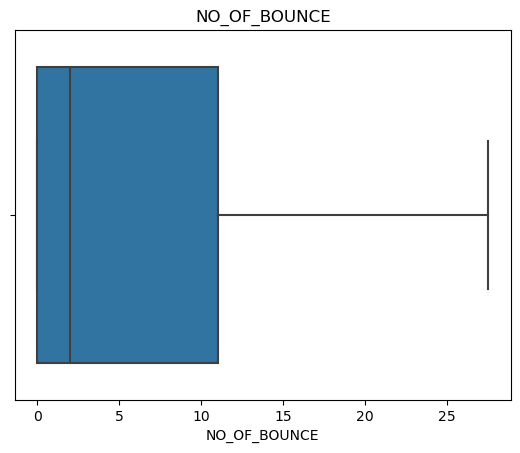

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


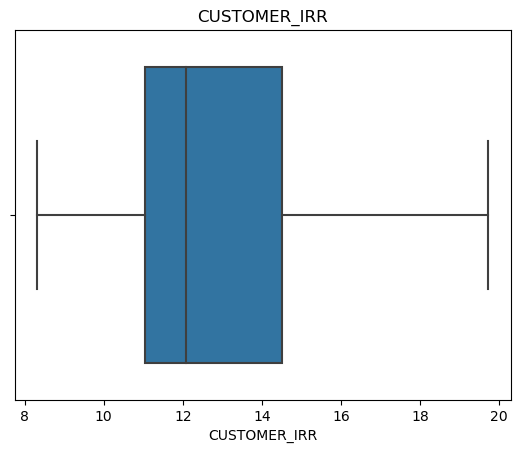

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


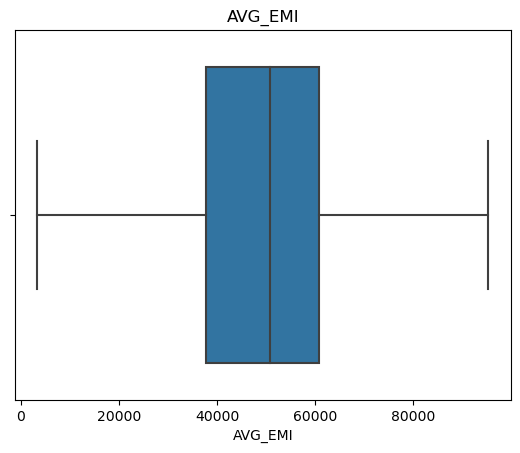

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


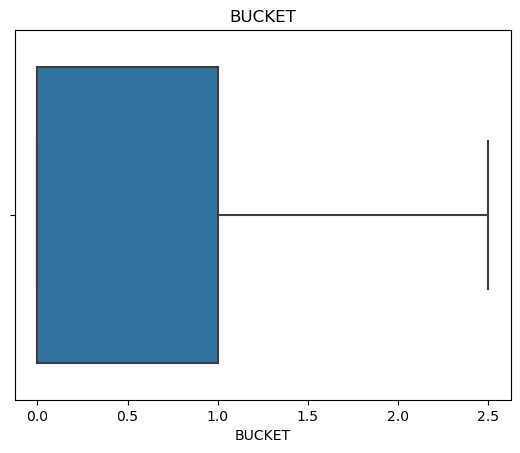

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


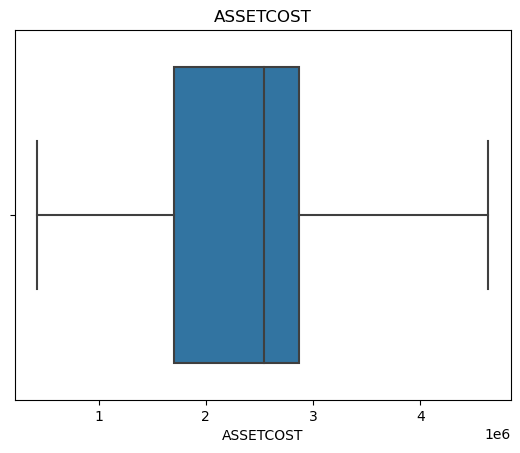

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


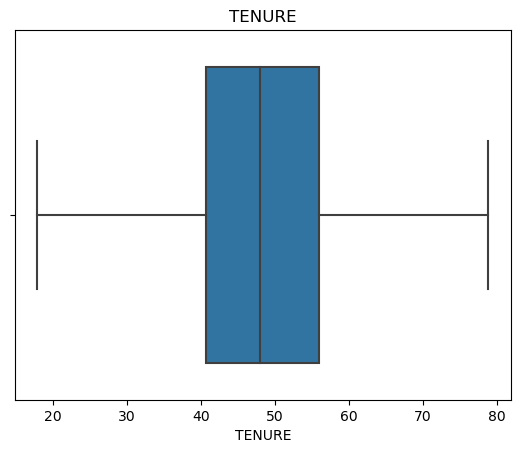

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


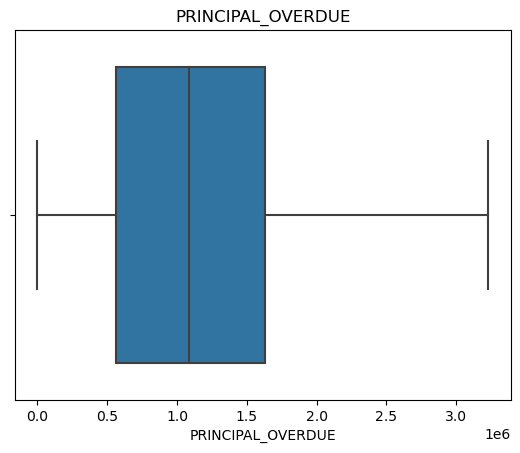

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


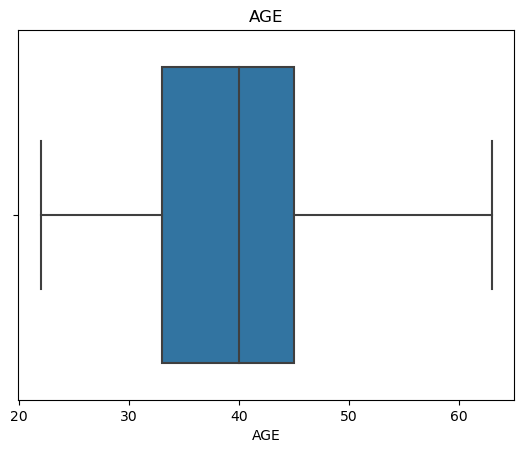

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


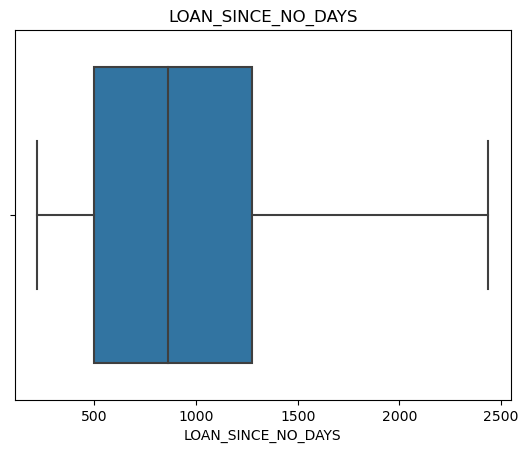

In [16]:
""" * All the numeric features have outlier except for branchid and schemaid as they are categorical
* DPD is directly related to DPD_GROUP target column, so not treating the outliers for these column. 
because when I did the outlier got only 4 uniques values"""

numeric = [i for i in numerical_features if i not in ['BRANCHID','SCHEME_ID','DPD']]

for feature in numeric:
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_limit = data[feature].quantile(0.25) - (IQR * 1.5)
    upper_limit = data[feature].quantile(0.75) + (IQR * 1.5)
    data[feature]= pd.DataFrame(np.where(data[feature] > upper_limit, upper_limit, 
                                             np.where(data[feature] < lower_limit, lower_limit, data[feature])))
for i in numeric:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

### Handling the Categorical values

In [17]:
#Removing the duplicates

data = data.drop_duplicates(keep='last')
print(data.shape)

(1000, 21)


In [18]:
data['DPD_GROUP'].unique()

array(['0-30', '>90', '61-90', '31-60'], dtype=object)

In [19]:
# Identifying categorical features and unique values in it

data[[i for i in data.columns if data[i].dtype==object]].nunique()

DPD_GROUP               4
NPA_STAGE_ID            3
CUSTOMER_CATG_DESC      9
MAKE                   86
ASSETTYPE               3
MODEL                 176
dtype: int64

In [20]:
# Using Binary Encoding for large number of categories feature

encoder = ce.BinaryEncoder(cols=['MAKE','MODEL','CUSTOMER_CATG_DESC'])
data = encoder.fit_transform(data)

# Using Label encoding for fewer categorical feature

data['NPA_STAGE_ID']= LabelEncoder().fit_transform(data['NPA_STAGE_ID'])
data['ASSETTYPE']= LabelEncoder().fit_transform(data['ASSETTYPE'])
data['SCHEME_ID']= LabelEncoder().fit_transform(data['SCHEME_ID'])

In [21]:
data.replace({'DPD_GROUP':{'0-30':0,'31-60':1,'61-90':2, '>90':3}},inplace=True)

In [22]:
data.head()

AMTFIN  DPD   OVERDUE  Total_Outstanding  DPD_GROUP  NO_OF_BOUNCE  \
0  2630854.0    4  50046.00          2466435.0          0           0.0   
1  1935000.0    4  85279.53          1104895.0          0          27.5   
2  1126085.0    0    278.73           772164.0          0           1.0   
3  1700000.0    0      0.00          1252415.0          0           0.0   
4  2032500.0    0   5213.00          1415699.0          0           5.0   

   NPA_STAGE_ID  BRANCHID  CUSTOMER_IRR  SCHEME_ID  ...  MODEL_1  MODEL_2  \
0             0      6851         11.00          0  ...        0        0   
1             0       690         13.15          0  ...        0        0   
2             0      6187         17.56          1  ...        0        0   
3             0       419         10.51          0  ...        0        0   
4             0       506         12.29          0  ...        0        0   

   MODEL_3  MODEL_4  MODEL_5  MODEL_6  MODEL_7  PRINCIPAL_OVERDUE   AGE  \
0        0        0        0        0        1          2444061.0  46.0   
1        0        0        0        1        0          1092916.0  30.0   
2        0        0        0        1        0           772164.0  56.0   
3        0        0        0        1        1          1252415.0  40.0   
4        0        0        0        0        1          1415699.0  37.0   

   LOAN_SINCE_NO_DAYS  
0               463.0  
1              1528.0  
2               619.0  
3               326.0  
4               940.0  

[5 rows x 37 columns]

### Corrolation Heatmap

In [23]:
corr=data.corr()
plt.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(corr, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

In [24]:
Correlation=pd.DataFrame(data.corr())
Feature=dict(zip(list(range(len(Correlation))), Correlation.columns))
temp=[]
for i in range(len(Correlation)):
    for j in range(len(Correlation.columns)):
        if (Correlation.iloc[i,j]>0.9 or Correlation.iloc[i,j]< -0.9) and int(Correlation.iloc[i,j])!=1:
            comb=str(Feature[i])+':'+str(Feature[j])
            temp.append(comb)
High_corr=sorted([*set(temp)],key=len)

# Considering these highly correlated features
print(High_corr)

['OVERDUE:BUCKET', 'BUCKET:OVERDUE', 'AMTFIN:ASSETCOST', 'ASSETCOST:AMTFIN', 'ASSETTYPE:SCHEME_ID', 'SCHEME_ID:ASSETTYPE', 'PRINCIPAL_OVERDUE:Total_Outstanding', 'Total_Outstanding:PRINCIPAL_OVERDUE']


In [25]:
# BUCKET, AMTFIN, SCHEME_ID, Total_Outstanding these columns are correlated features, so dropping them.

data.drop(['BUCKET','AMTFIN','SCHEME_ID','Total_Outstanding'],axis=1,inplace=True)

### EDA

In [26]:

####################    Continuous   ####################
df_num=data[[i for i in numerical_features if i not in ['BUCKET','AMTFIN','SCHEME_ID','Total_Outstanding','BRANCHID','DPD']]]

#First Business Moment

Mean=pd.DataFrame(df_num.mean(),columns=["Mean"]).reset_index()
Median=pd.DataFrame(df_num.median(),columns=["Median"]).reset_index()
m=[]
for i in df_num.columns:
    a = df_num[i].mode().iloc[0]
    m.append(a)
Mode=pd.DataFrame(m,columns=["Mode"]).reset_index()    

#Second Business Moment

Variance=pd.DataFrame(df_num.var(),columns=["Variance"]).reset_index()
Standard=pd.DataFrame(df_num.std(),columns=["Standard_Deviation"]).reset_index()
r=[]
for i in df_num.columns:
    a = max(df_num[i]) - min(df_num[i])
    r.append(a)
Range=pd.DataFrame(m,columns=["Range"]).reset_index()
    
#Third Business Moment
Skew=pd.DataFrame(df_num.skew(),columns=["Skew"]).reset_index()

#Fourth Business Moment
Kurtosis=pd.DataFrame(df_num.kurt(),columns=["Kurtosis"]).reset_index()

eda=pd.concat([Mean["index"],Mean["Mean"],Median["Median"],Mode["Mode"],
               Variance["Variance"],Standard["Standard_Deviation"],Range["Range"],
               Skew["Skew"],Kurtosis["Kurtosis"]],axis=1)

In [27]:
eda

index          Mean       Median          Mode      Variance  \
0             OVERDUE  3.589755e+04     1676.665  0.000000e+00  2.811439e+09   
1        NO_OF_BOUNCE  6.642500e+00        2.000  0.000000e+00  7.388433e+01   
2        CUSTOMER_IRR  1.292660e+01       12.070  1.100000e+01  5.959795e+00   
3             AVG_EMI  5.095718e+04    50725.445  9.532478e+04  4.098988e+08   
4           ASSETCOST  2.447382e+06  2542241.500  4.634406e+06  9.258237e+11   
5              TENURE  4.780225e+01       48.000  4.800000e+01  1.246713e+02   
6   PRINCIPAL_OVERDUE  1.198794e+06  1083011.000  3.229782e+06  6.827600e+11   
7                 AGE  3.956000e+01       40.000  4.000000e+01  7.830871e+01   
8  LOAN_SINCE_NO_DAYS  9.134230e+02      862.500  5.550000e+02  2.345535e+05   

   Standard_Deviation         Range      Skew  Kurtosis  
0        53023.004289  0.000000e+00  1.292299  0.246402  
1            8.595599  0.000000e+00  1.175887  0.017309  
2            2.441269  1.100000e+01  0.781628 -0.227396  
3        20245.956851  9.532478e+04  0.353637  0.176658  
4       962197.325049  4.634406e+06  0.467703  0.025574  
5           11.165630  4.800000e+01 -0.077392  0.144878  
6       826292.931741  3.229782e+06  0.777735 -0.015151  
7            8.849221  4.000000e+01  0.496388 -0.084067  
8          484.307237  5.550000e+02  0.512849 -0.514576

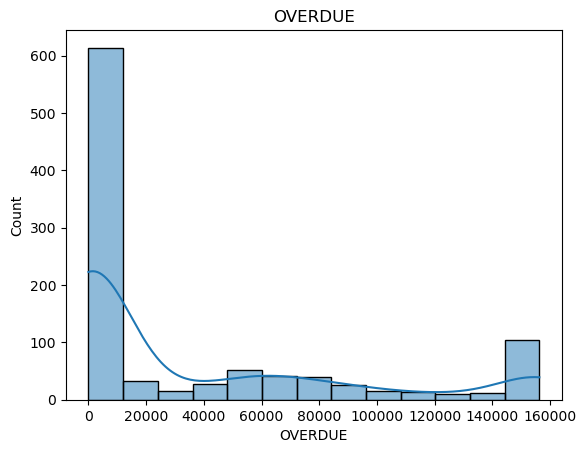

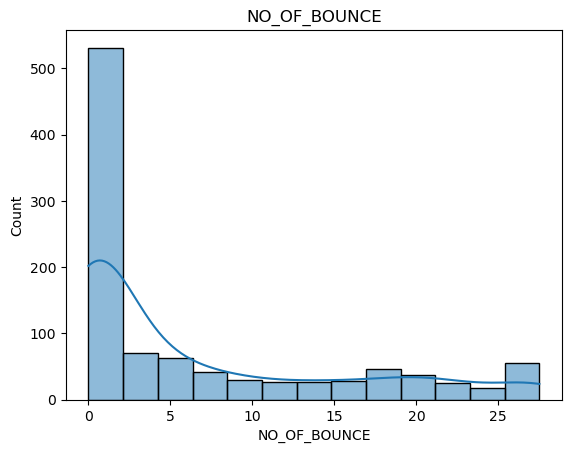

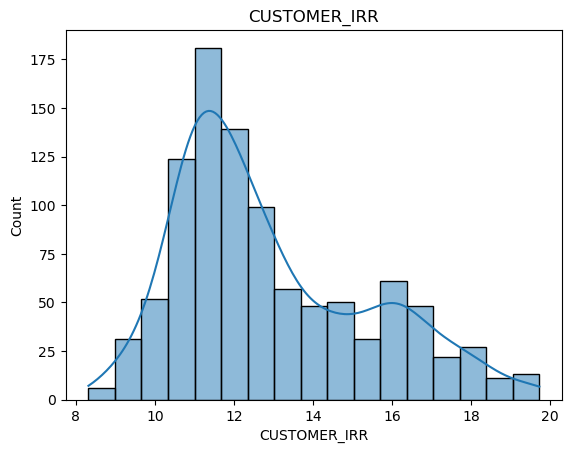

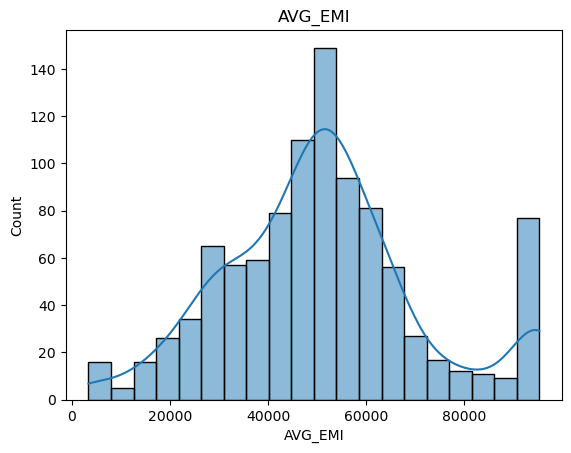

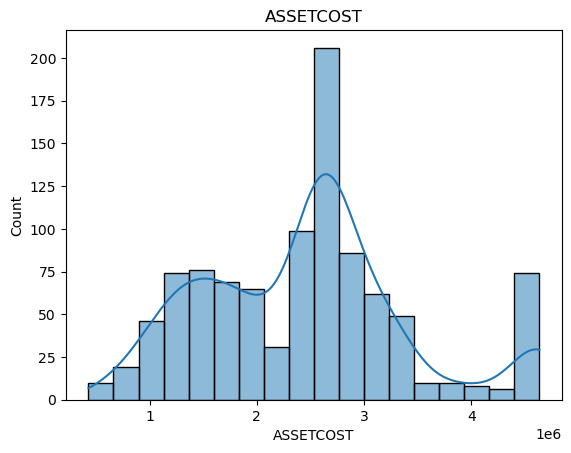

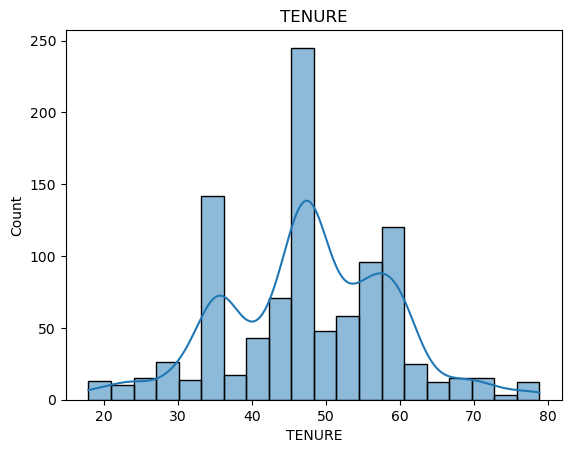

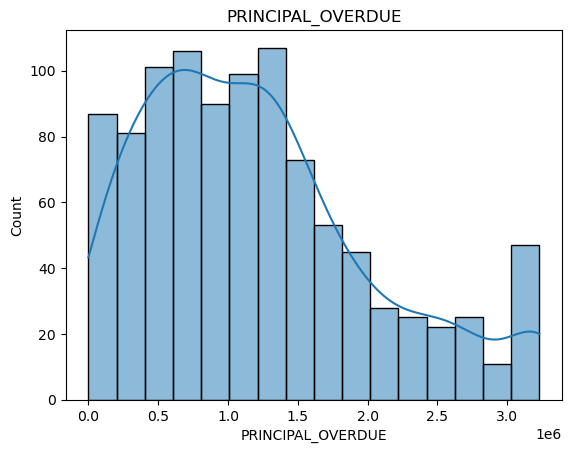

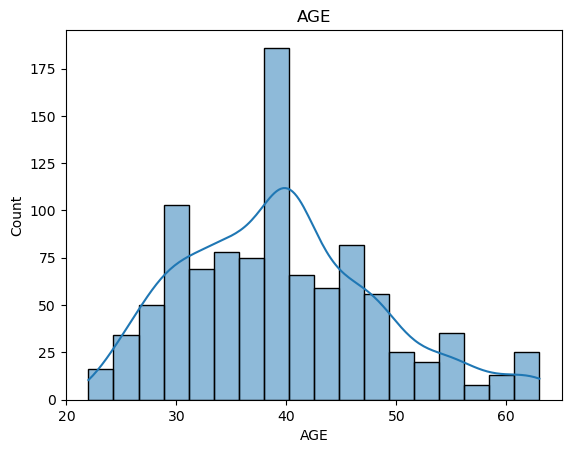

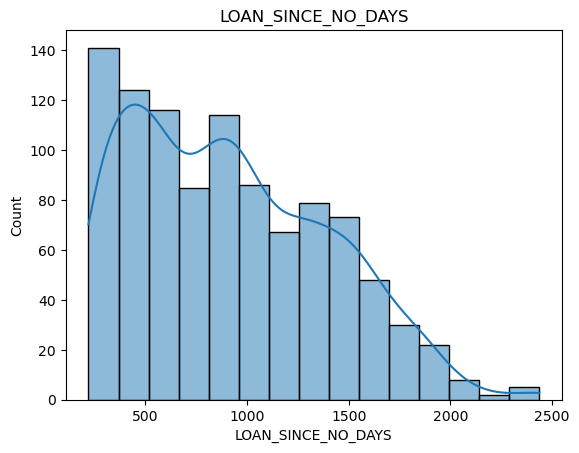

In [28]:
for i in [j for j in numerical_features if j not in ['BUCKET','AMTFIN','SCHEME_ID','Total_Outstanding','BRANCHID','DPD']]:
    sns.histplot(data[i],kde=True)
    plt.title(i)
    plt.show()

### Model training 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
 

In [31]:
y=data.loc[:,'DPD_GROUP']
data.drop('DPD_GROUP', axis=1, inplace=True)
x=data

# train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [54]:
# training with diff algorithms
models={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(), 
    "Adaboost classifier": AdaBoostClassifier(),
    "SVM classifier": SVC(kernel='linear')
}

# Train Model
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train)

    # Make predictions    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Training set performace
    train_accuracy= accuracy_score(y_train, y_train_pred)
    train_f1= f1_score(y_train, y_train_pred, average='weighted')
    train_precision= precision_score(y_train, y_train_pred, average='weighted')
    train_recall= recall_score(y_train, y_train_pred, average='weighted')
    
    #Test set performace
    test_accuracy= accuracy_score(y_test, y_test_pred)
    test_f1= f1_score(y_test, y_test_pred, average='weighted')
    test_precision= precision_score(y_test, y_test_pred, average='weighted')
    test_recall= recall_score(y_test, y_test_pred, average='weighted')
    
    print(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- F1 score: {:.4f}".format(train_f1))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    
    print('...................................')
    
    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(test_accuracy))
    print("- F1 score: {:.4f}".format(test_f1))
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    
    print('='*35)
    print('\n')

C:\Users\manir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.9271
- F1 score: 0.9248
- Precision: 0.9351
- Recall: 0.9271
...................................
Model performance for Test set
- Accuracy: 0.9000
- F1 score: 0.8931
- Precision: 0.9094
- Recall: 0.9000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
...................................
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
...................................
Model performance for Test set
- Accuracy: 0.9833
- F1 score: 0.9829
- Precision: 0.9831
- Recall: 0.9833


Adaboost classifier
Model performance for Training set
- Accuracy: 0.9586
- F1 score: 0.9446
- Precision: 0.9375
- Recall: 0.9586
...................................
Model performance for Te

C:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classifier
Model performance for Training set
- Accuracy: 0.9357
- F1 score: 0.9351
- Precision: 0.9394
- Recall: 0.9357
...................................
Model performance for Test set
- Accuracy: 0.9067
- F1 score: 0.9023
- Precision: 0.9038
- Recall: 0.9067




### GridSearchCV

In [46]:
param_grid={'n_estimators':[25,75,100,150,200],'max_features':[4,5,6,'auto'],
            'max_depth':[5,10,15,20,None],
           'min_samples_split':[2,5,8,10,15]}

grid_cv=GridSearchCV(RandomForestClassifier(),param_grid,cv=10)

grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'max_features': [4, 5, 6, 'auto'],
                         'min_samples_split': [2, 5, 8, 10, 15],
                         'n_estimators': [25, 75, 100, 150, 200]})

In [47]:
accuracy=grid_cv.best_score_
accuracy

0.99

In [48]:
grid_cv.best_params_

{'max_depth': 15,
 'max_features': 6,
 'min_samples_split': 5,
 'n_estimators': 100}

### Metrics of variuos Algorithms

**Logistic Regression**
Model performance for Training set
- Accuracy: 0.9271
- F1 score: 0.9248
- Precision: 0.9351
- Recall: 0.9271

...................................

Model performance for Test set
- Accuracy: 0.9000
- F1 score: 0.8931
- Precision: 0.9094
- Recall: 0.9000

===================================


**Decision Tree**
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

...................................

Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

===================================


**Random Forest**
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

...................................

Model performance for Test set
- Accuracy: 0.9767
- F1 score: 0.9759
- Precision: 0.9762
- Recall: 0.9767

===================================


**Adaboost classifier**
Model performance for Training set
- Accuracy: 0.9586
- F1 score: 0.9446
- Precision: 0.9375
- Recall: 0.9586

...................................

Model performance for Test set
- Accuracy: 0.9533
- F1 score: 0.9382
- Precision: 0.9309
- Recall: 0.9533

===================================


**SVM classifier**
Model performance for Training set
- Accuracy: 0.9357
- F1 score: 0.9351
- Precision: 0.9394
- Recall: 0.9357

...................................

Model performance for Test set
- Accuracy: 0.9067
- F1 score: 0.9023
- Precision: 0.9038
- Recall: 0.9067

===================================

### GridSearchCV 

Applied gridsearchcv with different combination of parameters gave **Maximum Accuracy : 0.99**

**Best Parameters**

{'max_depth': 15,
 'max_features': 6,
 'min_samples_split': 5,
 'n_estimators': 100}